# Chapter 16: Resource-Aware Optimization

리소스 인지 최적화(Resource-Aware Optimization)는 지능형 에이전트가 동작 중에 **계산 자원, 시간, 비용**과 같은 리소스를 동적으로 모니터링하고 관리할 수 있도록 하는 기법이다.

리소스 인지 최적화에서는 에이전트가 정해진 **리소스 예산 내에서 목표를 달성**하거나 **효율성을 최적화**하기 위해, 어떤 액션을 실제로 실행할지에 대한 결정을 내려야 한다. 여기에는 더 정확하지만 비용이 많이 드는 모델과 더 빠르고 저렴한 모델 중에서 선택하는 것, 혹은 더 정교한 응답을 위해 추가 연산 자원을 투입할지 아니면 더 빠르지만 덜 상세한 응답을 반환할지 결정하는 과정이 포함된다.

예를 들어, 한 에이전트가 재무 분석가를 위해 **대규모 데이터셋을 분석**하는 작업을 맡았다고 하자.     
분석가가 **즉시 예비 보고서**가 필요하다면, 에이전트는 더 빠르고 비용이 적게 드는 모델을 사용해 핵심 트렌드를 신속히 요약할 수 있다. 반대로, 분석가가 **중대한 투자 결정을 위한 매우 정확한 예측**을 요구하고, 더 큰 예산과 더 많은 시간이 주어진다면, 에이전트는 더 강력하지만 느리고 비용이 많이 드는 고정밀 예측 모델에 더 많은 리소스를 할당하게 된다.

이 범주에서 핵심 전략 중 하나는 **폴백(fallback) 메커니즘**이다. 이는 선호하는 모델이 과부하나 스로틀링(throttling)으로 인해 사용 불가능할 때를 대비한 안전장치로 작동한다. 시스템은 완전히 실패하는 대신 자동으로 기본 모델이나 더 저렴한 모델로 전환하여 **서비스 연속성**을 유지한다. 이를 통해 품질은 일부 저하될 수 있지만, 시스템이 중단되지 않고 **우아하게 성능이 점진적으로 떨어지는(graceful degradation)** 동작 방식을 보장할 수 있다.

## Practical Applications & Use Cases

- **비용 최적화 LLM 사용(Cost-Optimized LLM Usage)**:  
  에이전트가 예산 제약에 따라, 복잡한 작업에는 크고 비용이 많이 드는 LLM을 사용하고, 단순한 질의에는 더 작고 저렴한 모델을 사용하도록 결정하는 경우.

- **지연 시간 민감 작업(Latency-Sensitive Operations)**:  
  실시간 시스템에서 에이전트가 제때 응답을 보장하기 위해, 더 포괄적이지는 않을 수 있지만 더 빠른 추론 경로를 선택하는 경우.

- **에너지 효율성(Energy Efficiency)**:  
  엣지 디바이스나 제한된 전력 환경에 배포된 에이전트가 배터리 수명을 보존하기 위해 자신의 연산량을 최적화하는 경우.

- **서비스 신뢰성을 위한 폴백(Fallback for Service Reliability)**:  
  기본으로 사용하는 모델이 사용 불가능해졌을 때, 에이전트가 자동으로 백업 모델로 전환하여 서비스 연속성과 우아한 성능 저하(graceful degradation)를 보장하는 경우.

- **데이터 사용량 관리(Data Usage Management)**:  
  에이전트가 대역폭이나 저장 공간을 절약하기 위해 전체 데이터셋을 내려받는 대신, 요약된 데이터만 조회하는 방식을 선택하는 경우.

- **적응형 작업 할당(Adaptive Task Allocation)**:  
  멀티 에이전트 시스템에서 각 에이전트가 현재 계산 부하나 사용 가능한 시간을 기준으로 스스로 작업을 나누어 맡는 경우.

사용자 질문에 답변하는 지능형 시스템은 각 질문의 **난이도**를 평가할 수 있다.  
단순한 질의에는 **Gemini Flash**와 같은 **비용 효율적인 언어 모델**을 사용하고,  
복잡한 질문에는 더 강력하지만 비용이 높은 **Gemini Pro** 같은 언어 모델을 사용한다.  

이때, 더 강력한 모델을 사용할지 여부는 **리소스 가용성**—특히 **예산과 시간 제약**—에 따라 달라진다.  
즉, 이 시스템은 상황에 맞게 적절한 모델을 **동적으로 선택**한다.

여행 플래너를 예로 들어보자. 계층적(hierarchical) 에이전트로 만들어진 여행 플래너에서:

- 사용자의 복잡한 요구를 이해하고,  
- 이를 여러 단계의 일정으로 나누며,  
- 논리적인 결정을 내리는 **고수준 플래닝** 부분은  

**Gemini Pro** 같은 **정교하고 강력한 LLM**이 담당한다.  
이 에이전트는 “플래너(planner) 에이전트”로서, 깊은 컨텍스트 이해와 추론 능력이 필요하다.

반면, 플랜이 한 번 확정된 후에 수행되는 개별 작업들 —  
예를 들어:

- 항공권 가격 조회  
- 호텔 예약 가능 여부 확인  
- 레스토랑 리뷰 탐색  

등은 본질적으로 단순하고 반복적인 **웹 조회 작업**이다.  
이러한 “도구 함수 호출(tool function calls)”은 **Gemini Flash**처럼 더 빠르고 저렴한 모델로 처리할 수 있다.

이렇게 생각하면:

- **복잡한 계획을 세우는 단계**에는 고급 모델이 필요하고,  
- **단순한 웹 검색·조회 단계**에는 저렴한 모델로 충분하다는 점이  

보다 직관적으로 이해된다.  
즉, **정교한 플래닝 단계**에는 고급 모델의 높은 지능이 필요하지만,  
단순 반복 작업은 **가성비 좋은 모델**로 처리해도 전체 여행 플랜의 일관성과 논리는 유지된다.


## Query Router 에이전트 

질문 난이도·비용·지연 시간 제약을 고려해 cheap/expensive LLM을 동적으로 라우팅하는 Query Router 에이전트를 구현

In [1]:
from __future__ import annotations

import os
from typing import Literal, Optional, AsyncGenerator, List
from dotenv import load_dotenv

from langgraph.graph import StateGraph, START, END, MessagesState
from langgraph.checkpoint.memory import MemorySaver

from langchain_core.messages import AnyMessage, HumanMessage, AIMessage, SystemMessage

from langchain_openai import ChatOpenAI
from langchain_google_genai import ChatGoogleGenerativeAI

expensive_llm / critic_llm : Gemini Flash

In [2]:
load_dotenv()

GEMINI_API_KEY = os.getenv("GEMINI_API_KEY")
GEMINI_MODEL = "gemini-2.0-flash"

expensive_llm = ChatGoogleGenerativeAI(
    api_key=GEMINI_API_KEY,
    model=GEMINI_MODEL,
    temperature=0.3,
)

critic_llm = ChatGoogleGenerativeAI(
    api_key=GEMINI_API_KEY,
    model=GEMINI_MODEL,
    temperature=0.3,
)

cheap_llm : OpenAI 호환 / 로컬 LLM ( llama.cpp )

In [3]:
BASE_URL = os.getenv("OPENAI_BASE_URL")
API_KEY = os.getenv("OPENAI_API_KEY")
MODEL_NAME = os.getenv("MODEL_NAME")

cheap_llm = ChatOpenAI(
    base_url=BASE_URL,
    api_key=API_KEY,
    model=MODEL_NAME,
    temperature=0.0,
)

2. 상태 정의 (LangGraph v1 MessagesState 확장)

In [4]:
# 내장 MessagesState 사용 (권장)

class AppState(MessagesState):
    """
    LangGraph v1의 MessagesState를 상속한 상태.
    messages: List[BaseMessage] 속성을 기본적으로 포함.
    add_messages 리듀서가 적용됨
    """

    max_cost: Optional[float]
    max_latency_s: Optional[float]

    target_model: Optional[str] # "cheap" 또는 "expensive"
    used_model: Optional[str] # 실제로 사용된 모델 이름
    critique: Optional[str] # Critic Agent의 피드백

라우팅 규칙: Query Router Agent

In [5]:
def query_router_node(state: AppState) -> dict:
    """
    Query Router 노드:
    - 내부적으로 상태의 messages를 검사
    - 마지막 HumanMessage의 길이를 기준으로 라우팅 결정
    - max_cost 및 max_latency_s를 고려하여 라우팅 결정
    - "cheap" 또는 "expensive" 경로 중 하나를 선택하여 반환
    """
    messages = state["messages"]

    # 마지막 HumanMessage 찾기
    last_human_message = None
    for msg in reversed(messages):
        if isinstance(msg, HumanMessage):
            last_human_message = msg
            break

    if last_human_message is None:
        print("[Router] 사용자 메시지가 없어 기본적으로 cheap으로 라우팅합니다.")
        route = "cheap" # 기본 경로
        return {"target_model": route}

    text = str(last_human_message.content)
    num_words = len(text.split())

    max_cost = state.get("max_cost", 0.01)
    max_latency = state.get("max_latency_s", 5.0)

    print("=== [Router] 상태 ===")
    print(f"- 사용자 질의 길이(단어 수 추정): {num_words}")
    print(f"- max_cost: {max_cost}")
    print(f"- max_latency_s: {max_latency}")

    # num_words가 20 이하인 경우 간단한 질의로 간주
    is_simple_by_length = (num_words <= 20)
    # 0.01달러 미만인 경우 예산이 빠듯한 것으로 간주
    is_tight_budget = (max_cost < 0.01)
    # 3초 미만인 경우 낮은 대기 시간으로 간주
    is_low_latency = (max_latency < 3.0)

    if is_simple_by_length and (is_tight_budget or is_low_latency):
        print("[Router] 짧은 질의 + 빠듯한 예산/낮은 대기 시간 -> cheap 경로 선택")
        route = "cheap"
        return {"target_model": route}

    if num_words >= 40 and (max_cost >= 0.02 and max_latency >= 5.0):
        print("[Router] 긴 질의 + 충분한 예산/대기 시간 -> expensive 경로 선택")
        route = "expensive"
        return {"target_model": route}

    if 20 < num_words < 40 and max_latency >= 4.0:
        print("[Router] 중간 길이 질의 + 충분한 대기 시간 -> expensive 경로 선택")
        route = "expensive"
        return {"target_model": route}


    print("[Router] 기본 -> cheap 경로 선택")
    route = "cheap"
    return {"target_model": route}

답변 생성 노드: cheap / expensive

In [6]:
def cheap_answer_node(state: AppState) -> dict:
    """
    cheap_llm을 사용하여 응답 생성
    """
    print("[Cheap Answer] cheap_llm을 사용해서 응답 생성 시작")
    ai_message: AIMessage = cheap_llm.invoke(
        state["messages"]
    )
    print("[Cheap Answer] 응답 생성 완료")
    return {
        "messages": [ai_message],
        "used_model": f"cheap_llm",
    }


def expensive_answer_node(state: AppState) -> dict:
    """
    expensive_llm을 사용하여 응답 생성
    """
    print("[Expensive Answer] expensive_llm을 사용해서 응답 생성 시작")
    ai_message: AIMessage = expensive_llm.invoke(
        state["messages"]
    )
    print("[Expensive Answer] 응답 생성 완료")
    return {
        "messages": [ai_message],
        "used_model": f"expensive_llm",
    }

Critique Agent 노드

In [7]:
def critique_node(state: AppState) -> dict:
    messages = state["messages"]

    last_human_message = None
    for msg in reversed(messages):
        if isinstance(msg, HumanMessage):
            last_human_message = msg
            break

    last_ai_message = None
    for msg in reversed(messages):
        if isinstance(msg, AIMessage):
            last_ai_message = msg
            break

    if last_human_message is None or last_ai_message is None:
        critique = "피드백을 생성할 충분한 대화 내역이 없습니다."
        return {"critique": critique}

    print("[Critique] Critic LLM을 사용해서 피드백 생성 시작")
    print(f"- 사용자 메시지: {last_human_message.content}")
    print(f"- AI 응답 메시지: {last_ai_message.content[:200]}...") # 긴 응답의 경우 앞부분만 출력

    system_prompt = SystemMessage(
        content="""당신은 **크리틱 에이전트(Critic Agent)** 입니다.
                역할은 다른 에이전트(답변 에이전트)가 생성한 응답의 품질을 점검하고,
                정확성·완전성·명확성·편향 여부를 평가한 뒤, 개선 방향을 제안하는 것입니다.

                다음 항목을 기준으로 평가하세요:
                1. 사실적 정확성
                2. 정보의 완전성 및 깊이
                3. 설명의 명확성·구조화 정도
                4. 잠재적인 편향·오해 소지가 있는 표현

                출력 형식은 다음과 같이 해주세요:

                [강점]
                - ...

                [문제점 / 개선 필요 영역]
                - ...

                [개선 제안]
                - 구체적으로 어떻게 수정하거나 보완하면 좋을지 제안하세요.

                [종합 평점]
                - 1 ~ 5 점 사이에서 한 줄로 요약 (예: "4/5 - 전반적으로 좋지만 예시가 더 있으면 좋겠습니다.")

                사용자 질문과 답변이 한국어라면 한국어로, 그렇지 않다면 해당 언어로 답변하세요.
                """
    )

    critic_input = [
        system_prompt,
        HumanMessage(
            content=(
                "다음은 사용자의 원래 질의입니다:\n"
                f"{last_human_message.content}\n\n"
                "다음은 에이전트의 응답입니다:\n"
                f"{last_ai_message.content}\n\n"
                "위 응답에 대해 한국어로 평가와 개선 제안을 작성해주세요."
            )
        ),
    ]

    critique_response: AIMessage = critic_llm.invoke(critic_input)
    print("[Critique] 피드백 생성 완료")
    print(f"- 생성된 피드백: {critique_response.content[:200]}...") # 긴 응답의 경우 앞부분만 출력

    return {
        "messages": [critique_response],
        "critique": critique_response.content,
    }

In [8]:
graph_builder = StateGraph(AppState)

graph_builder.add_node("router", query_router_node)
graph_builder.add_node("cheap_answer", cheap_answer_node)
graph_builder.add_node("expensive_answer", expensive_answer_node)
graph_builder.add_node("critique", critique_node)

graph_builder.add_edge(START, "router")

graph_builder.add_conditional_edges(
    "router",
    lambda x: x["target_model"],
    {
        "cheap": "cheap_answer",
        "expensive": "expensive_answer",
    }
)

graph_builder.add_edge("cheap_answer", "critique")
graph_builder.add_edge("expensive_answer", "critique")
graph_builder.add_edge("critique", END)

checkpointer = MemorySaver()
app = graph_builder.compile(checkpointer=checkpointer)

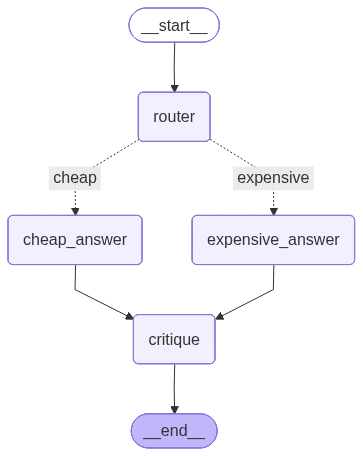

In [9]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [18]:
simple_q = "서울에서 1시간 안에 갈 수 있는 가벼운 드라이브 코스 추천해줘."

print("\n\n===== [테스트 1] SIMPLE QUESTION =====")
result = app.invoke(
    {
        "messages": [HumanMessage(content=simple_q)],
        "max_cost": 0.005,      # 예산 빡빡
        "max_latency_s": 2.0,   # 짧은 시간 제한
    },
    config={"thread_id": "test_simple_question "}
)
print("\n[결과]")
for msg in result["messages"]:
    print(f"- {msg.content}")
print(f"- 사용된 모델: {result['used_model']}")
print(f"- Critique:\n{result['critique']}")



===== [테스트 1] SIMPLE QUESTION =====
=== [Router] 상태 ===
- 사용자 질의 길이(단어 수 추정): 10
- max_cost: 0.005
- max_latency_s: 2.0
[Router] 짧은 질의 + 빠듯한 예산/낮은 대기 시간 -> cheap 경로 선택
[Cheap Answer] cheap_llm을 사용해서 응답 생성 시작
[Cheap Answer] 응답 생성 완료
[Critique] Critic LLM을 사용해서 피드백 생성 시작
- 사용자 메시지: 서울에서 1시간 안에 갈 수 있는 가벼운 드라이브 코스 추천해줘.
- AI 응답 메시지: 서울에서 1시간 안에 갈 수 있는 가벼운 드라이브 코스를 추천해드릴게요. 서울 중심부에서 1시간 이내로 가는 곳이라면, 자연, 볼거리, 맛집 등 다양한 선택지가 있습니다. 아래는 가벼운 드라이브 코스 추천입니다:

---

### 🚗 1. **서울시내 주변 (1시간 이내)**
1. **서울시립대학교 (서울대)**
   - 위치: 서울 서초구
   - 특징:...
[Critique] 피드백 생성 완료
- 생성된 피드백: [강점]
- 사용자의 질문 의도(서울에서 1시간 이내의 가벼운 드라이브 코스)를 파악하고, 다양한 테마(자연, 맛집, 볼거리 등)로 분류하려는 시도는 좋았습니다.

[문제점 / 개선 필요 영역]
-   **심각한 사실적 오류:**
    *   "서울시립대학교 (서울대)"는 잘못된 명칭 조합이며, 서울대학교는 관악구에, 서울시립대학교는 동대문구에 위치합니다...

[결과]
- 서울에서 1시간 안에 갈 수 있는 가벼운 드라이브 코스 추천해줘.
- 서울에서 1시간 안에 갈 수 있는 가벼운 드라이브 코스를 추천해드릴게요. 서울 중심부에서 1시간 이내로 가는 곳이라면, 자연, 볼거리, 맛집 등 다양한 선택지가 있습니다. 아래는 가벼운 드라이브 코스 추천입니다:

---

### 🚗 1. **서울시내 주변 (1시간 이내)**
1. **서울시립대학교 (서울대)**
   -

In [10]:
print("\n\n===== [테스트 2] COMPLEX QUESTION =====")

complex_q = """
내년 상반기에 유럽으로 3주 정도 장기 여행을 가려고 해.
예산은 항공료 제외 400만 원 정도이고, 역사·미술·음식·자연을 모두 적당히 즐기고 싶어.
파리, 로마, 바르셀로나, 프라하를 고려 중인데,
도시별 추천 체류 일수, 이동 동선, 주요 볼거리, 식당/지역 추천까지 포함해서
너무 빡빡하지 않게 세부 일정 플랜을 짜줘.
또 계절별 혼잡도, 휴관일, 치안 이슈도 고려해서 설명해줘.
"""

result2 = app.invoke(
    {
        "messages": [HumanMessage(content=complex_q)],
        "max_cost": 0.05,       # 예산 여유
        "max_latency_s": 10.0,  # 시간도 여유
    },
    config={"thread_id": "test_complex_question "}
)
print("\n[결과]")
for msg in result2["messages"]:
    print(f"- {msg.content}")
print(f"- 사용된 모델: {result2['used_model']}")
print(f"- Critique:\n{result2['critique']}")



===== [테스트 2] COMPLEX QUESTION =====
=== [Router] 상태 ===
- 사용자 질의 길이(단어 수 추정): 52
- max_cost: 0.05
- max_latency_s: 10.0
[Router] 긴 질의 + 충분한 예산/대기 시간 -> expensive 경로 선택
[Expensive Answer] expensive_llm을 사용해서 응답 생성 시작
[Expensive Answer] 응답 생성 완료
[Critique] Critic LLM을 사용해서 피드백 생성 시작
- 사용자 메시지: 
내년 상반기에 유럽으로 3주 정도 장기 여행을 가려고 해.
예산은 항공료 제외 400만 원 정도이고, 역사·미술·음식·자연을 모두 적당히 즐기고 싶어.
파리, 로마, 바르셀로나, 프라하를 고려 중인데,
도시별 추천 체류 일수, 이동 동선, 주요 볼거리, 식당/지역 추천까지 포함해서
너무 빡빡하지 않게 세부 일정 플랜을 짜줘.
또 계절별 혼잡도, 휴관일, 치안 이슈도 고려해서 설명해줘.

- AI 응답 메시지: ## 2025년 상반기 유럽 3주 여행 세부 일정 플랜 (400만원 예산, 항공료 제외)

**여행 컨셉:** 역사, 미술, 음식, 자연을 적당히 즐기는 여유로운 여행

**여행 시기:** 2025년 4월 말 ~ 5월 초 (날씨, 혼잡도 고려)

**총 예산:** 400만원 (항공료 제외)

**여행 도시:** 파리, 로마, 바르셀로나, 프라하

**숙소:...
[Critique] 피드백 생성 완료
- 생성된 피드백: [강점]
- 3주 여행에 적합한 4개 도시를 잘 선정했고, 각 도시별 추천 이유와 체류 일수를 명확하게 제시했습니다.
- 도시별 주요 볼거리, 식당/지역 추천, 세부 일정을 구체적으로 작성하여 여행 계획을 세우는 데 실질적인 도움을 줍니다.
- 예산 분배 계획을 제시하여 여행자가 예산을 효율적으로 관리할 수 있도록 돕습니다.
- 혼잡도, 휴관일, 치안 등 ...

[결과]
- 
내년 상반기에 유럽으로 3주 정도 장기 여

## LangGraph v1.x 에이전트 라우터 예제

In [2]:
from __future__ import annotations

import os
import json
from typing import Literal, Optional, List, TypedDict, Annotated

from dotenv import load_dotenv

from langgraph.graph import StateGraph, START, END, MessagesState
from langgraph.checkpoint.memory import MemorySaver

from langchain_core.messages import (
    AnyMessage,
    HumanMessage,
    AIMessage,
    SystemMessage,
)
from langchain_core.runnables import RunnableConfig

from langchain_openai import ChatOpenAI
from langchain_google_genai import ChatGoogleGenerativeAI

from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.tools import tool

from langchain.agents import create_agent
from langchain.agents.middleware import ModelCallLimitMiddleware

LLM 인스턴스

In [3]:
load_dotenv()

GEMINI_API_KEY = os.getenv("GEMINI_API_KEY")
GEMINI_MODEL = "gemini-2.0-flash"

classifier_llm = ChatGoogleGenerativeAI(
    api_key=GEMINI_API_KEY,
    model=GEMINI_MODEL,
    temperature=0.0,
)

simple_llm = ChatGoogleGenerativeAI(
    api_key=GEMINI_API_KEY,
    model=GEMINI_MODEL,
    temperature=0.3,
)

search_llm = ChatGoogleGenerativeAI(
    api_key=GEMINI_API_KEY,
    model=GEMINI_MODEL,
    temperature=0.3,
)

REASONING_BASE_URL = os.getenv("OPENAI_BASE_URL")
REASONING_API_KEY = os.getenv("OPENAI_API_KEY")
REASONING_MODEL_NAME = os.getenv("MODEL_NAME")

reasoning_llm = ChatOpenAI(
    base_url=REASONING_BASE_URL,
    api_key=REASONING_API_KEY,
    model=REASONING_MODEL_NAME,
    temperature=0.0,
)

State 정의

In [4]:
class RouterState(MessagesState):
    """
    LangGraph v1의 MessagesState를 상속한 상태.
    messages: List[BaseMessage] 속성을 기본적으로 포함.
    add_messages 리듀서가 적용됨

    - classification: "simple" | "reasoning" | "internet_search"
    - search_results: 검색 결과를 LLM 컨텍스트로 쓰기 위한 텍스트
    - model_used: 실제 응답 생성에 사용된 모델 이름
    """
    classification: Optional[str]
    search_results: Optional[str]
    model_used: Optional[str]


Step 1: classify_prompt → classifier_node

In [5]:
from pydantic import BaseModel
from typing import Literal


class ClassificationOutput(BaseModel):
    classification: Literal["simple", "reasoning", "internet_search"]


def classifier_node(
        state: RouterState, config: RunnableConfig | None = None
) -> dict:
    """
    원본 classify_prompt(prompt: str) → dict 와 동일한 역할.
    - 마지막 Human 메시지를 가져와 classifier_llm(Gemini)로 분류
    - 결과 JSON을 파싱하여 state["classification"] 에 저장
    """
    last_user_message = None
    for msg in reversed(state["messages"]):
        if isinstance(msg, HumanMessage):
            last_user_message = msg
            break

    messages = [
        SystemMessage(
            content="""
            당신은 사용자 프롬프트를 세 가지 카테고리 중 하나로 분류하는 **클래스 분류기 에이전트**입니다.

            반드시 아래 셋 중 하나만 골라야 합니다:
            - simple
            - reasoning
            - internet_search

            분류 기준:
            - simple:
                - 단순 사실 질의, 짧은 설명, 일상적인 정보 요청 등
                - 복잡한 단계적 추론이 필요 없고, 최신 정보(날짜/실시간 데이터)가 중요하지 않은 경우
            - reasoning:
                - 수학, 논리 퍼즐, 여러 단계를 거치는 깊은 추론이 필요한 경우
                - 장기 계획 짜기, 복잡한 의사결정, 비교·평가 등
            - internet_search:
                - 최신 뉴스, 주가/시세, 일정(콘서트, 경기, 대회), 현재 통계 등
                - 모델이 학습하지 못했을 가능성이 높은 **최근 정보**를 요구하는 경우

            출력 형식:
            반드시 아래 JSON 형식으로만 출력하세요.

            {
            "classification": "simple" | "reasoning" | "internet_search"
            }
            """),
        HumanMessage(
            content=str(last_user_message.content)
        ),
    ]

    structured_classification_llm = classifier_llm.with_structured_output(ClassificationOutput)
    result: ClassificationOutput = structured_classification_llm.invoke(messages, config=config)
    classification = result.classification
    print(f"[Classifier] 분류기 응답(structured): {classification}")

    if classification not in ("simple", "reasoning", "internet_search"):
        print(f"[Classifier] 잘못된 분류 '{classification}' 감지, 기본값 'simple' 사용")
        classification = "simple"

    debug_message = AIMessage(
        content=f"[Classifier] 분류 결과: {classification}"
    )

    # 분류 결과 메시지도 messages에 추가
    return {
        "messages": state["messages"] + [debug_message],
        "classification": classification,
    }


def route_after_classification(state: RouterState) -> Literal[
    "google_search", "generate_response"
]:
    """
    원본 handle_prompt 에서:
      - classification == "internet_search" → google_search 호출
      - 그 외 → 바로 generate_response
    """
    classification = state.get("classification", "simple")
    if classification == "internet_search":
        print("[Router] 'internet_search' 분류 -> 'google_search' 경로 선택")
        return "google_search"
    else:
        print(f"[Router] '{classification}' 분류 -> 'generate_response' 경로 선택")
        return "generate_response"

Step 2: google_search → google_search_node (Tavily)

In [6]:
tavily_search = TavilySearchResults(
    api_key=os.getenv("TAVILY_API_KEY"),
    num_results=5,
)

def google_search_node(
    state: RouterState, config: RunnableConfig | None = None
) -> dict:
    """
    원본 google_search(query, num_results) 와 같은 역할.
    - 마지막 사용자 질문을 Tavily로 검색
    - 결과를 LLM 컨텍스트로 넣을 수 있는 하나의 텍스트로 직렬화
    """
    last_user_message = None
    for msg in reversed(state["messages"]):
        if isinstance(msg, HumanMessage):
            last_user_message = msg
            break

    if last_user_message is None:
        print(f"[GoogleSearch] 사용자 메시지가 없어 검색을 수행하지 않습니다.")
        return {"search_results": "검색할 사용자 질문이 없습니다."}

    query = str(last_user_message.content)
    print(f"[GoogleSearch] Tavily로 '{query}' 검색 시작")

    results = tavily_search.invoke({"query": query})
    lines = []

    for item in results:
        title = item.get("title", "")
        snippet = item.get("content", "") or item.get("snippet", "")
        link = item.get("url", "") or item.get("source", "")
        lines.append(
            f"Title: {title}\nSnippet: {snippet}\nLink: {link}\n"
        )

    search_text = "\n\n".join(lines)
    print(f"[GoogleSearch] 검색 완료, {len(results)}개 결과 수집")
    return {"search_results": search_text}

/var/folders/k6/rnm2z36939g8qznfcdykwkzh0000gn/T/ipykernel_66267/1057180187.py:1: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the `langchain-tavily package and should be used instead. To use it run `pip install -U `langchain-tavily` and import as `from `langchain_tavily import TavilySearch``.
  tavily_search = TavilySearchResults(


reasoning용 tool + create_agent + middleware

In [7]:
REASONING_SYSTEM_PROMPT = """
당신은 복잡한 문제를 단계적으로 해결하는 **심층 추론 한국어 에이전트**입니다.

역할:
- 사용자의 질문을 이해하고, 필요한 경우 제공된 도구(local_calculator)를 사용하여 계산을 수행합니다.
- 여러 단계를 거쳐 논리적으로 사고하고, 중간 생각 과정을 간단히 설명합니다.
- 최종 결론을 마지막에 한두 문장으로 명확히 정리합니다.

중요:
- 이 에이전트는 인터넷 검색 도구를 사용하지 않습니다.
- 최신 뉴스나 실시간 데이터 대신, 내부 지식과 논리적 추론, 계산 도구만 활용하세요.
""".strip()

call_limit_middleware = ModelCallLimitMiddleware(
    thread_limit=20,
    run_limit=8,
    exit_behavior="end",
)

reasoning_agent = create_agent(
    model=reasoning_llm,
    system_prompt=REASONING_SYSTEM_PROMPT,
    middleware=[call_limit_middleware],
)

Step 3: generate_response → generate_response_node

In [12]:
def generate_response_node(
    state: RouterState, config: RunnableConfig | None = None
) -> dict:
    """
    원본 generate_response(prompt, classification, search_results=None) 와 동일한 책임.

    - classification에 따라:
      - simple: Gemini Flash
      - reasoning: Qwen(laama-server) + create_agent(middleware)
      - internet_search: Tavily 결과 + Gemini Flash
    """
    classification = state.get("classification") or "simple"
    last_user_message = None
    for msg in reversed(state["messages"]):
        if isinstance(msg, HumanMessage):
            last_user_message = msg
            break

    prompt_text = last_user_message.content if last_user_message else ""

    if classification == "reasoning":
        print(
            f"[GenerateResponse] reasoning -> Qwen Agent "
            f"(create_agent) 사용해서 응답 생성 시작"
        )

        agent_result = reasoning_agent.invoke(
            {"messages": state["messages"]},
            config=config,
        )

        messages = agent_result.get("messages", [])
        print("[GenerateResponse] reasoning agent 실행 완료, 메시지 수:", len(messages))

        return {
            "messages": messages,
            "model_used": f"reasoning_agent(Qwen)",
        }

    if classification == "internet_search":
        print(f"[GenerateResponse] internet_search -> gemini-2.5-flash + Tavily 컨텍스트")
        search_ctx = state.get("search_results", "검색 결과가 없습니다.")

        system_msg = SystemMessage(
            content="""
            당신은 웹 검색 결과를 활용해 최신 정보 기반으로 답변하는 **한국어 어시스턴트**입니다.
            - 제공된 검색 결과를 참고하여, 사용자의 질문에 대한 종합적인 답변을 작성하세요.
            - 각 출처를 그대로 나열하기보다는, 내용을 요약·통합해서 자연스러운 하나의 답변으로 만들어 주세요.
            - 검색 결과에 없거나 불확실한 내용은 추측하지 말고, "알 수 없다"거나 "추가 확인이 필요하다"고 명시하세요.
            """
        )
        user_wrapper = HumanMessage(
            content=(
                f"다음은 웹 검색 결과입니다:\n{search_ctx}\n\n"
                f"이 정보를 바탕으로 다음 질문에 답변해 주세요:\n\n"
                f"[사용자 질문]\n{prompt_text}"
            )
        )

        resp: AIMessage = search_llm.invoke([system_msg, user_wrapper], config=config)
        return {
            "messages": state["messages"] + [resp],
            "model_used": "gemini-2.5-flash + Tavily"
        }

    print(f"[GenerateResponse] simple -> gemini-2.5-flash 사용해서 응답 생성 시작")
    msgs = [
        SystemMessage(
            content="""
            당신은 사용자의 질문에 간단하고 명확하게 답변하는 **친절한 한국어 어시스턴트**입니다.
            - 복잡한 수식이나 깊은 추론보다, 직관적이고 이해하기 쉬운 설명을 우선합니다.
            - 필요하면 예시를 한두 개만 간단히 들어주세요.
            """
          ),
          HumanMessage(
              content=str(prompt_text)
          ),
    ]
    resp: AIMessage = simple_llm.invoke(msgs, config=config)
    return {
        "messages": state["messages"] + [resp],
        "model_used": "gemini-2.5-flash",
    }


In [13]:
builder = StateGraph(RouterState)

builder.add_node("classifier", classifier_node)
builder.add_node("google_search", google_search_node)
builder.add_node("generate_response", generate_response_node)

builder.add_edge(START, "classifier")
builder.add_conditional_edges(
    "classifier",
    route_after_classification
)
builder.add_edge("google_search", "generate_response")
builder.add_edge("generate_response", END)

checkpointer = MemorySaver()
app = builder.compile(checkpointer=checkpointer)

/var/folders/k6/rnm2z36939g8qznfcdykwkzh0000gn/T/ipykernel_66267/294907825.py:3: UserWarning: The 'config' parameter should be typed as 'RunnableConfig' or 'RunnableConfig | None', not 'RunnableConfig | None'. 
  builder.add_node("classifier", classifier_node)
/var/folders/k6/rnm2z36939g8qznfcdykwkzh0000gn/T/ipykernel_66267/294907825.py:4: UserWarning: The 'config' parameter should be typed as 'RunnableConfig' or 'RunnableConfig | None', not 'RunnableConfig | None'. 
  builder.add_node("google_search", google_search_node)
/var/folders/k6/rnm2z36939g8qznfcdykwkzh0000gn/T/ipykernel_66267/294907825.py:5: UserWarning: The 'config' parameter should be typed as 'RunnableConfig' or 'RunnableConfig | None', not 'RunnableConfig | None'. 
  builder.add_node("generate_response", generate_response_node)


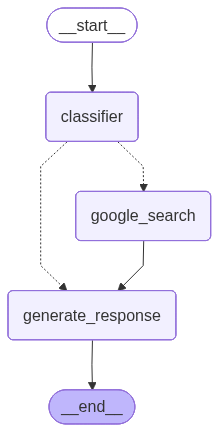

In [14]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [15]:
test_prompt_1 = "호주의 수도가 어디야?"

print("\n\n===== [테스트 1] SIMPLE QUESTION =====")
result = app.invoke(
    {
        "messages": [HumanMessage(content=test_prompt_1)],
    },
    config={"thread_id": "test_simple_question "}
)
print("\n[결과]")

print("🔍 Classification:", result.get("classification"))
print("🧠 Model Used:", result.get("model_used"))

ai_msgs = [m for m in result["messages"] if isinstance(m, AIMessage)]
if ai_msgs:
    print("🧠 Response:\n", ai_msgs[-1].content)
else:
    print("🧠 Response: <no AI message>")



===== [테스트 1] SIMPLE QUESTION =====
[Classifier] 분류기 응답(structured): simple
[Router] 'simple' 분류 -> 'generate_response' 경로 선택
[GenerateResponse] simple -> gemini-2.5-flash 사용해서 응답 생성 시작

[결과]
🔍 Classification: simple
🧠 Model Used: gemini-2.5-flash
🧠 Response:
 호주의 수도는 캔버라(Canberra)입니다. 시드니나 멜버른으로 오해하는 경우가 있지만, 캔버라가 맞습니다.


In [17]:
test_prompt_2 = "매달 30만 원씩 3년 동안 적금하면 총 원금이 얼마인지, 계산 과정을 단계별로 설명해줘."

print("\n\n===== [테스트 2] REASONING QUESTION =====")
result = app.invoke(
    {
        "messages": [HumanMessage(content=test_prompt_2)],
    },
    config={"thread_id": "test_reasoning_question "}
)
print("\n[결과]")

print("🔍 Classification:", result.get("classification"))
print("🧠 Model Used:", result.get("model_used"))

ai_msgs = [m for m in result["messages"] if isinstance(m, AIMessage)]
if ai_msgs:
    print("🧠 Response:\n", ai_msgs[-1].content)
else:
    print("🧠 Response: <no AI message>")



===== [테스트 2] REASONING QUESTION =====
[Classifier] 분류기 응답(structured): reasoning
[Router] 'reasoning' 분류 -> 'generate_response' 경로 선택
[GenerateResponse] reasoning -> Qwen Agent (create_agent) 사용해서 응답 생성 시작
[GenerateResponse] reasoning agent 실행 완료, 메시지 수: 5

[결과]
🔍 Classification: reasoning
🧠 Model Used: reasoning_agent(Qwen)
🧠 Response:
 

1. **적금 금액 확인**: 매달 30만 원씩 적금을 하는 것이므로, 매달의 적금 금액은 300,000 원입니다.

2. **적금 기간 확인**: 3년 동안 적금을 진행하므로, 총 적금 기간은 3년입니다.

3. **월별 적금 수량 계산**: 3년은 36개월(3×12)에 해당하므로, 총 적금 횟수는 36회입니다.

4. **총 원금 계산**: 매달 30만 원을 36개월 동안 적금하면, 총 원금은 다음과 같이 계산됩니다:  
   $ 300,000 \times 36 = 10,800,000 $ 원

5. **결론**: 매달 30만 원씩 3년 동안 적금을 하면 총 원금은 10,800,000 원입니다.


In [18]:
test_prompt_3 = "호주 오픈 2026은 언제 시작하나요? 정확한 날짜를 알려주세요."

print("\n\n===== [테스트 3] INTERNET SEARCH QUESTION =====")
result = app.invoke(
    {
        "messages": [HumanMessage(content=test_prompt_3)],
    },
    config={"thread_id": "test_internet_search_question "}
)
print("\n[결과]")

print("🔍 Classification:", result.get("classification"))
print("🧠 Model Used:", result.get("model_used"))

ai_msgs = [m for m in result["messages"] if isinstance(m, AIMessage)]
if ai_msgs:
    print("🧠 Response:\n", ai_msgs[-1].content)
else:
    print("🧠 Response: <no AI message>")



===== [테스트 3] INTERNET SEARCH QUESTION =====
[Classifier] 분류기 응답(structured): internet_search
[Router] 'internet_search' 분류 -> 'google_search' 경로 선택
[GoogleSearch] Tavily로 '호주 오픈 2026은 언제 시작하나요? 정확한 날짜를 알려주세요.' 검색 시작
[GoogleSearch] 검색 완료, 5개 결과 수집
[GenerateResponse] internet_search -> gemini-2.5-flash + Tavily 컨텍스트

[결과]
🔍 Classification: internet_search
🧠 Model Used: gemini-2.5-flash + Tavily
🧠 Response:
 호주 오픈 2026은 2026년 1월 12일부터 2월 1일까지 멜버른 파크에서 개최됩니다. 주요 경기(main draw)는 1월 18일 일요일에 시작하여, 여자 단식 결승은 1월 31일 토요일 밤, 남자 단식 결승은 2월 1일 일요일 밤에 치러질 예정입니다.


# OpenRouter

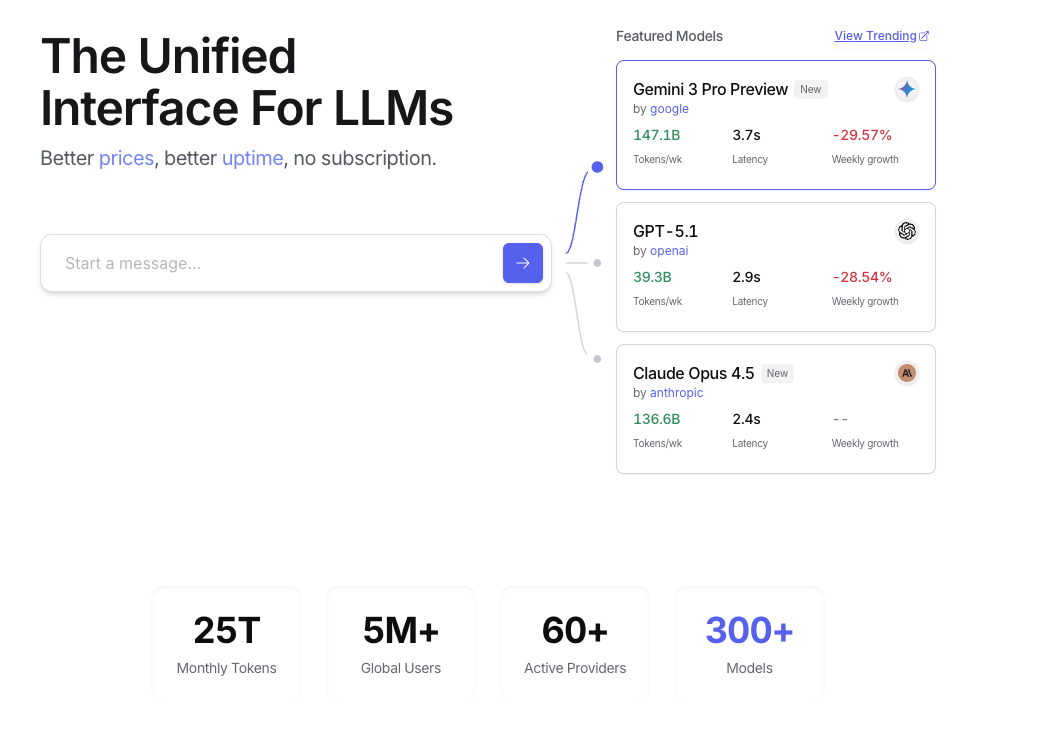

OpenRouter는 단일 API 엔드포인트를 통해 수백 개의 AI 모델에 접근할 수 있는 **통합 인터페이스**를 제공.  
이를 통해 자동 장애 조치(failover)와 **비용 최적화**를 지원하며, 선호하는 SDK나 프레임워크와도 쉽게 통합할 수 있다.
      
          
OpenRouter는 특정 요청을 처리할 때 사용할 **컴퓨팅 모델을 선택하고 라우팅하는 두 가지 주요 방법론**을 제공한다.


In [20]:
from dotenv import load_dotenv

load_dotenv()

OPENROUTER_API_KEY = os.getenv("OPENROUTER_API_KEY")

In [21]:
import requests
import json

# 테스트: 추론 기능 활성화하여 간단한 질문 보내기
response = requests.post(
    url="https://openrouter.ai/api/v1/chat/completions",
    headers={
        "Authorization": f"Bearer {OPENROUTER_API_KEY}",
        "Content-Type": "application/json",
    },
    data=json.dumps({
        "model": "arcee-ai/trinity-mini:free",
        "messages": [
            {
            "role": "user",
            "content": "How many r's are in the word 'strawberry'?"
            }
        ],
        "reasoning": {"enabled": True}
    })
)

# assistant 메시지 추출 추론 결과 출력
response = response.json()
response = response['choices'][0]['message']

print(response)

{'role': 'assistant', 'content': '\nThe word "strawberry" has the following letters: S, T, R, A, W, B, E, R, R, Y.\n\nCounting the occurrences of the letter \'r\' (lowercase):\n- Position 3: R\n- Position 8: R\n\nThere are two \'r\'s in "strawberry".\n\n**Answer:** 2', 'refusal': None, 'reasoning': 'First, the question is: "How many r\'s are in the word \'strawberry\'?"\n\nI need to count the number of times the letter \'r\' appears in the word \'strawberry\'. Let me write out the word: S-T-R-A-W-B-E-R-R-Y.\n\nNow, I\'ll go through each letter one by one:\n\n- Position 1: S - not \'r\'\n\n- Position 2: T - not \'r\'\n\n- Position 3: R - that\'s an \'r\'. So, one \'r\'.\n\n- Position 4: A - not \'r\'\n\n- Position 5: W - not \'r\'\n\n- Position 6: B - not \'r\'\n\n- Position 7: E - not \'r\'\n\n- Position 8: R - that\'s another \'r\'. So, now we have two \'r\'s.\n\n- Position 9: R - wait, is there an \'r\' at position 9? Let me check the word again.\n\nThe word is \'strawberry\', which 

In [22]:
print(response['content'])


The word "strawberry" has the following letters: S, T, R, A, W, B, E, R, R, Y.

Counting the occurrences of the letter 'r' (lowercase):
- Position 3: R
- Position 8: R

There are two 'r's in "strawberry".

**Answer:** 2


In [23]:
print(response['reasoning_details'])

[{'format': 'unknown', 'index': 0, 'type': 'reasoning.text', 'text': 'First, the question is: "How many r\'s are in the word \'strawberry\'?"\n\nI need to count the number of times the letter \'r\' appears in the word \'strawberry\'. Let me write out the word: S-T-R-A-W-B-E-R-R-Y.\n\nNow, I\'ll go through each letter one by one:\n\n- Position 1: S - not \'r\'\n\n- Position 2: T - not \'r\'\n\n- Position 3: R - that\'s an \'r\'. So, one \'r\'.\n\n- Position 4: A - not \'r\'\n\n- Position 5: W - not \'r\'\n\n- Position 6: B - not \'r\'\n\n- Position 7: E - not \'r\'\n\n- Position 8: R - that\'s another \'r\'. So, now we have two \'r\'s.\n\n- Position 9: R - wait, is there an \'r\' at position 9? Let me check the word again.\n\nThe word is \'strawberry\', which is spelled: S-T-R-A-W-B-E-R-R-Y. That\'s 9 letters. Positions:\n\n1. S\n\n2. T\n\n3. R\n\n4. A\n\n5. W\n\n6. B\n\n7. E\n\n8. R\n\n9. R? No, it should be Y at the end.\n\n\'Strawberry\' has 9 letters: S, T, R, A, W, B, E, R, R, Y? T

### 

**Automated Model Selection** 기능은, 사용자의 프롬프트 내용을 기반으로  
미리 큐레이션된 모델 집합 중에서 **가장 적합한 모델을 자동으로 선택**하여 요청을 라우팅하는 방식    
요청을 실제로 처리한 최종 모델은 **응답 메타데이터에 포함**된다.

In [30]:
response = requests.post(
  url="https://openrouter.ai/api/v1/chat/completions",
  headers={
    "Authorization": f"Bearer {OPENROUTER_API_KEY}",
    "Content-Type": "application/json",
  },
  data=json.dumps({
    "model": "openrouter/auto",
    "messages": [
      {
        "role": "user",
        "content": "What is the meaning of life?"
      }
    ]
  })
)

automated_model_selection_answer = response.json()
print(automated_model_selection_answer['choices'][0]['message']['content'])


The meaning of life is a philosophical question that has been debated for centuries, and it doesn't have one definitive answer as it can vary greatly depending on personal beliefs, religious or spiritual views, and philosophical persuasions. Here are a few perspectives:

1. **Existentialism**: Existentialists like Jean-Paul Sartre and Simone de Beauvoir argued that life has no inherent meaning, and it's up to each individual to create their own purpose.

2. **Religious and Spiritual Perspectives**: Many religions provide their own answers. For example:
   - In Christianity, the purpose of life might be seen as loving and serving God and others, and preparing for eternal life.
   - In Buddhism, the purpose could be achieving enlightenment and ending the cycle of rebirth.
   - In Hinduism, the purpose might involve fulfilling one's dharma and ultimately achieving Moksha (liberation from the cycle of life and death).

3. **Hedonism**: Hedonists believe the purpose of life is to seek pleas

In [31]:
automated_model_selection_answer

{'id': 'gen-1764669391-ayf8BSH025n3gTryNad2',
 'provider': 'DeepInfra',
 'model': 'mistralai/mistral-nemo',
 'object': 'chat.completion',
 'created': 1764669395,
 'choices': [{'logprobs': None,
   'finish_reason': 'stop',
   'native_finish_reason': 'stop',
   'index': 0,
   'message': {'role': 'assistant',
    'content': 'The meaning of life is a philosophical question that has been debated for centuries, and it doesn\'t have one definitive answer as it can vary greatly depending on personal beliefs, religious or spiritual views, and philosophical persuasions. Here are a few perspectives:\n\n1. **Existentialism**: Existentialists like Jean-Paul Sartre and Simone de Beauvoir argued that life has no inherent meaning, and it\'s up to each individual to create their own purpose.\n\n2. **Religious and Spiritual Perspectives**: Many religions provide their own answers. For example:\n   - In Christianity, the purpose of life might be seen as loving and serving God and others, and preparing fo

### Sequential Model Fallback (순차 모델 폴백)
Sequential Model Fallback 메커니즘은 운영상의 안정성과 중복성(레던던시)을 확보하기 위한 방식.    
사용자는 여러 개의 모델을 **우선순위가 있는 리스트(계층 구조)**로 지정할 수 있다.    

동작 방식:
1.	시스템은 먼저 리스트에서 가장 상위(1순위) 모델로 요청을 처리 시도

2.	이 1순위 모델이 다음과 같은 이유로 응답에 실패할 경우:
    - 서비스 장애 또는 일시적 불가
    - 레이트 리밋(rate limiting)
    - 콘텐츠 필터링 정책 위반 등


3.	시스템은 자동으로 다음 순위 모델로 재시도 요청

4.	리스트에 있는 모델이 성공할 때까지 반복, 모든 모델이 실패하면 최종적으로 요청 실패

5.	최종 청구 비용과 응답에 포함된 모델 ID는 실제로 요청을 성공적으로 처리한 마지막 모델

In [32]:
response = requests.post(
  url="https://openrouter.ai/api/v1/chat/completions",
  headers={
    "Authorization": f"Bearer {OPENROUTER_API_KEY}",
    "Content-Type": "application/json",
  },
  data=json.dumps({
    "models": ["anthropic/claude-3.5-sonnet", "gryphe/mythomax-l2-13b"],
    "messages": [
      {
        "role": "user",
        "content": "What is the meaning of life?"
      }
    ]
  })
)

sequential_model_fallback = response.json()
print(sequential_model_fallback['choices'][0]['message']['content'])

 The meaning of life is highly subjective and varies from person to person. Some believe it's about pursuing happiness, achieving goals, or leaving a lasting impact on the world. Others may find meaning in spirituality, relationships, or simply appreciating the beauty of life. Ultimately, the meaning of life is unique to each individual and can be discovered through introspection and personal experience.


In [33]:
sequential_model_fallback

{'id': 'gen-1764669409-Y7rHikb2CbiXnsdn5H8n',
 'provider': 'NextBit',
 'model': 'gryphe/mythomax-l2-13b',
 'object': 'chat.completion',
 'created': 1764669410,
 'choices': [{'logprobs': None,
   'finish_reason': 'stop',
   'native_finish_reason': 'stop',
   'index': 0,
   'message': {'role': 'assistant',
    'content': " The meaning of life is highly subjective and varies from person to person. Some believe it's about pursuing happiness, achieving goals, or leaving a lasting impact on the world. Others may find meaning in spirituality, relationships, or simply appreciating the beauty of life. Ultimately, the meaning of life is unique to each individual and can be discovered through introspection and personal experience.",
    'refusal': None,
    'reasoning': None}}],
 'usage': {'prompt_tokens': 43, 'total_tokens': 127, 'completion_tokens': 84}}

## Beyond Dynamic Model Switching: 에이전트 리소스 최적화 스펙트럼

리소스 인지(Resource-aware) 최적화는 **현실 세계의 제약(비용, 시간, 계산 자원)** 속에서  
효율적이고 효과적으로 동작해야 하는 지능형 에이전트 시스템에 있어 필수적인 개념입니다.  

**동적 모델 스위칭을 넘어** 에이전트가 활용할 수 있는 다양한 리소스 최적화 기법들이 있다.

---

### Dynamic Model Switching (동적 모델 전환)

**Dynamic Model Switching**은 작업의 난이도와 사용 가능한 계산 자원을 기준으로  
어떤 LLM을 사용할지 전략적으로 선택하는 핵심 기법.

- 단순한 질의에는 **가볍고 비용 효율적인 LLM**을 사용하고  
- 복잡하고 다단계 추론이 필요한 문제에는 **더 크고 성능이 좋은 고비용 LLM**을 사용

---

### Adaptive Tool Use & Selection (적응형 도구 사용 및 선택)

에이전트가 다양한 도구(tool)들 중에서  
**각 서브태스크에 가장 적합하면서도 효율적인 도구를 선택**하도록 하는 기법

- API 호출 비용
- 응답 지연(latency)
- 실행 시간

과 같은 요소를 고려하여 도구를 선택하고 사용함으로써,  
외부 API·서비스 사용을 최적화로 **시스템 전체의 효율**을 높인다.

---

### Contextual Pruning & Summarization (문맥 가지치기 및 요약)

에이전트가 처리해야 하는 **정보량을 관리** 역할

- 프롬프트에 포함되는 토큰 수를 전략적으로 줄이고
- 상호작용 히스토리에서 **가장 관련 있는 정보만 선별·유지**하며
- 나머지는 요약하거나 버려서

추론(inference) 비용을 줄이고, **불필요한 계산 오버헤드**를 방지

---

### Proactive Resource Prediction (선제적 리소스 예측)

향후 작업량(workload)과 시스템 요구사항을 **미리 예측**하여,  
리소스를 선제적으로 배분·관리

- 앞으로 필요한 컴퓨트, 메모리, API 호출량 등을 예측하고
- 그에 따라 미리 준비해 둠으로써

시스템의 **응답성을 유지**하고, **병목(bottleneck)** 발생을 방지

---

### Cost-Sensitive Exploration (비용 민감 탐색)

멀티 에이전트 시스템에서의 **탐색·협력 전략**을 비용 관점까지 확장하는 기법

- 단순 계산 비용뿐 아니라
- 에이전트 간 **통신 비용**(메시지 교환, 호출 횟수 등)까지 고려하여

에이전트들이 서로 정보를 주고받고 협력하는 방식을 설계함으로써,  
시스템 전체의 **총 리소스 사용량을 최소화**를 목표로 한다.

---

### Energy-Efficient Deployment (에너지 효율적 배포)

특히 **제한된 자원 환경**(모바일, 엣지 디바이스, 배터리 기반 장치 등)에 맞춘 최적화 기법

- 에이전트 시스템의 **에너지 소비를 최소화**하고
- 동작 시간을 늘리며
- 운영 비용을 줄이는 것에 초점

이를 위해 경량 모델 사용, 연산 스케줄링, 저전력 모드 등이 전략이 될 수 있다

---

### Parallelization & Distributed Computing Awareness (병렬화 및 분산 컴퓨팅 인지)

에이전트가 분산된 자원을 활용해 **처리 성능과 처리량(throughput)을 높이는** 기법

- 여러 머신 또는 프로세서에 작업을 분산하고
- 병렬 처리를 통해

전체 작업을 더 빠르고 효율적으로 끝낼 수 있도록 한다.  
에이전트는 이 분산 환경을 인지하고, **어떻게 작업을 쪼개고 분배할지**까지 고려해야 한다.

---

### Learned Resource Allocation Policies (학습 기반 리소스 할당 정책)

에이전트가 **경험과 피드백, 성능 지표**를 바탕으로  
시간이 지날수록 리소스 사용 전략을 학습·개선해 나가는 기법

- 어떤 상황에서 어떤 모델/도구/전략을 쓰는 것이
- 비용·성능 면에서 가장 좋은지

를 학습 기반 정책으로 만들어, **지속적으로 효율을 향상**시킬 수 있다.

---

### Graceful Degradation and Fallback Mechanisms (우아한 성능 저하와 폴백 메커니즘)

리소스가 매우 부족한 상황에서도 **시스템이 완전히 멈추지 않고**,  
축소된 형태로나마 계속 동작하도록 하는 안전장치.

- 고사양 기능을 부분적으로 끄거나
- 더 간단한 모델/전략으로 폴백(fallback)하면서도
- 핵심 기능은 유지하도록 설계.

이를 통해 **완전 다운 대신 “품질이 낮아진 상태로라도 서비스 유지”**를 목표로 하며,  
사용자에게 최소한의 필수 기능을 제공할 수 있게 한다.

## At a Glance

### What

**리소스 인지 최적화(Resource-Aware Optimization)** 는  
지능형 시스템에서 **계산 자원, 시간(지연), 비용(금전적 리소스)** 소비를 관리하는 문제를 다룬다.  

LLM 기반 애플리케이션은 종종 **비용이 많이 들고 느리며**,  
모든 작업에 대해 항상 최고의 모델이나 툴을 선택하는 것은 비효율적일 수 있다.  
( **출력 품질**과 **소모되는 리소스** 사이의 트레이드오프 )

**동적인 리소스 관리 전략이 없다면**, 시스템은  
- 각기 다른 작업 난이도에 맞게 적응하지 못하고  
- 예산이나 성능(응답 시간) 제약 안에서 안정적으로 동작하기 어렵다.

---

### Why

시스템이 **응답 품질과 비용 효율성을 균형 있게 유지**하면서  
효율적으로 동작하도록 만들어 준다.

표준적인 해법은, **작업에 따라 지능적으로 리소스를 모니터링하고 배분하는 에이전트 시스템**을 구축

- **Router Agent**  
    - 먼저 들어온 요청의 **복잡도를 분류**  
    - 그 결과에 따라 요청을 가장 적합한 LLM 또는 툴로 라우팅  
        - 단순 질의 → 빠르고 저렴한 모델  
        - 복잡한 추론이 필요한 문제 → 더 강력하고 고비용인 모델

- **Critique Agent**  
    - 생성된 응답의 **품질을 평가**하고 피드백을 제공  
    - 이 피드백을 통해 라우터의 라우팅 로직이 **시간이 지날수록 개선**되도록 도움

---

### Rule of Thumb

- **API 호출 비용이나 계산 자원에 엄격한 예산 제한**이 있는 경우  

- **지연(latency)에 민감한 애플리케이션**을 구축해야 해서 빠른 응답 시간이 중요한 경우  

- **배터리·연산 능력이 제한된 엣지 디바이스** 등에 에이전트를 배포하는 경우  

- **응답 품질과 운영 비용 간의 트레이드오프**를 코드 레벨에서 프로그래밍적으로 조정해야 하는 경우  

- 여러 단계로 구성된 복잡한 워크플로에서, **각 단계마다 요구되는 리소스가 서로 다른 작업들을 관리**해야 하는 경우

### Key Takeaways (핵심 요약)

- **리소스 인지 최적화는 필수적!**  
  지능형 에이전트는 **계산 자원, 시간(지연), 비용(금전적 리소스)** 을 동적으로 관리할 수 있다.  
  어떤 모델을 쓸지, 어떤 실행 경로를 탈지에 대한 결정은 **실시간 제약 조건과 목표** 기반으로 이뤄진다.

- **동적, LLM 기반 라우팅**  
  
    **Router Agent**는 질의의 복잡도와 예산을 기준으로 LLM을 선택해 라우팅한다.  
    - 단순 질의 → Gemini Flash  
    - 복잡한 질의 → Gemini Pro  

    이를 통해 **비용과 성능을 동시에 최적화**한다.

- **Critique Agent의 역할**  

  - 자기 수정(self-correction)을 위한 피드백 제공  
  - 성능 모니터링  
  - 라우팅 로직 개선  

  등을 수행하여 시스템의 **효과성과 신뢰성**을 높인다.

- **피드백과 유연성을 통한 최적화**  
  크리틱 평가 기능과 유연한 모델 통합 능력은  
  시스템이 **적응적이고 자기 개선(self-improving)** 하는 방향으로 진화하도록 돕는다.

- **추가적인 리소스 인지 최적화 기법들**  
  - Adaptive Tool Use & Selection (적응형 도구 사용 및 선택)  
  - Contextual Pruning & Summarization (문맥 가지치기 및 요약)  
  - Proactive Resource Prediction (선제적 리소스 예측)  
  - Cost-Sensitive Exploration in Multi-Agent Systems (멀티 에이전트 시스템에서의 비용 민감 탐색)  
  - Energy-Efficient Deployment (에너지 효율적 배포)  
  - Parallelization & Distributed Computing Awareness (병렬화 및 분산 컴퓨팅 인지)  
  - Learned Resource Allocation Policies (학습 기반 리소스 할당 정책)  
  - Graceful Degradation and Fallback Mechanisms (우아한 성능 저하 및 폴백 메커니즘)  
  - Prioritization of Critical Tasks (중요/긴급 작업에 대한 우선순위 부여)

### Conclusions (결론)

리소스 인지 최적화는 지능형 에이전트 개발에 있어 **필수 요소**로,  
현실 세계의 제약 속에서 **효율적으로 동작**할 수 있게 해준다.  

계산 자원, 시간(지연), 비용과 같은 리소스를 체계적으로 관리함으로써  
에이전트는 **성능과 비용 효율성 사이에서 최적의 균형**을 달성할 수 있다.  

- **Dynamic Model Switching**, **Adaptive Tool Use**, **Contextual Pruning**과 같은 기법은  
  이러한 효율성을 확보하는 데 핵심적인 역할을 한다.
- 더 나아가, **학습 기반 리소스 할당 정책(Learned Resource Allocation Policies)** 과  
  **Graceful Degradation(우아한 성능 저하)** 같은 고급 전략은  
  다양한 환경과 조건 변화 속에서도 에이전트의 **적응력과 회복력(resilience)** 을 높여준다.

이러한 리소스 최적화 원칙을 에이전트 설계에 통합하는 것은  
**확장 가능하고, 견고하며, 지속 가능한 AI 시스템**을 구축하기 위한 기본 조건이라 할 수 있다.

In [2]:
from langchain.agents import create_agent
from langchain.agents.middleware import AgentMiddleware, wrap_model_call, wrap_tool_call
from langchain.chat_models import init_chat_model
from langchain.messages import HumanMessage, SystemMessage
from typing import Callable, Any, List

In [5]:
import os
from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI

load_dotenv()

GEMINI_API_KEY = os.getenv("GEMINI_API_KEY")
HEAVY_MODEL = "gemini-2.5-flash"
LIGHT_MODEL = "gemini-2.0-flash"


heavy_llm = ChatGoogleGenerativeAI(
    api_key=GEMINI_API_KEY,
    model=HEAVY_MODEL,
    temperature=0.3,
)

light_llm = ChatGoogleGenerativeAI(
    api_key=GEMINI_API_KEY,
    model=LIGHT_MODEL,
    temperature=0.3,
)

In [15]:
@wrap_model_call
def state_based_model_selector(
    request,  # ModelRequest
    handler: Callable[..., Any]
) -> Any:
    # 모델 호출 직전에 어떤 모델을 쓸지 선택
    message_count = len(request.messages[-1].content)
    if message_count > 20:
        print(f"[Model Selector] 메시지 수 {message_count} > 20 -> heavy_llm 선택")
        model = heavy_llm
    else:
        print(f"[Model Selector] 메시지 수 {message_count} <= 20 -> light_llm 선택")
        model = light_llm
    return handler(request.override(model=model))

agent = create_agent(
    model=light_llm,  # 기본 모델 (실제로는 state_based_model_selector가 선택)
    system_prompt="당신은 유능한 한국어 어시스턴트입니다.",
    middleware=[state_based_model_selector],
)

# 테스트: 메시지 수에 따라 모델이 바뀌는지 확인
short_messages = [HumanMessage(content="안녕?")]
long_messages = [HumanMessage(content="대한민국의 0년 부터 2025년 까지의 역사에 대해 자세히 설명해줘.")]

print("=== [테스트 1] 짧은 대화 ===")
response1 = agent.invoke({"messages": short_messages})
print(response1["messages"][-1].content)

print("\n=== [테스트 2] 긴 대화 ===")
response2 = agent.invoke({"messages": long_messages})
print(response2["messages"][-1].content)

=== [테스트 1] 짧은 대화 ===
[Model Selector] 메시지 수 3 <= 20 -> light_llm 선택
안녕하세요! 무엇을 도와드릴까요? 😊

=== [테스트 2] 긴 대화 ===
[Model Selector] 메시지 수 38 > 20 -> heavy_llm 선택
대한민국은 1948년에 건국된 국가이지만, 요청하신 "0년부터 2025년까지의 역사"는 사실상 한반도 전체의 역사를 의미하는 것으로 이해하고 설명해 드리겠습니다. 기원전부터 현대에 이르기까지 한반도에서 일어난 주요 사건과 흐름을 자세히 다루겠습니다.

---

## 한반도의 역사 (기원전 ~ 2025년)

### 1. 고대 국가의 형성 (기원전 ~ 7세기)

*   **삼국시대의 시작 (기원전 1세기 ~ 4세기):**
    *   **고구려:** 기원전 37년 주몽(동명성왕)이 압록강 유역에 건국. 만주와 한반도 북부를 아우르는 강력한 국가로 성장하며 중국과 대립. 광개토대왕, 장수왕 시기에 전성기를 맞이하여 영토를 크게 확장하고 한반도 남부까지 영향력을 행사했습니다.
    *   **백제:** 기원전 18년 온조왕이 한강 유역에 건국. 해상 무역이 발달하여 중국 남조 및 일본과 활발히 교류하며 선진 문물을 수용하고 전파했습니다. 근초고왕 시기에 전성기를 누렸습니다.
    *   **신라:** 기원전 57년 박혁거세가 경주 지역에 건국. 삼국 중 가장 늦게 발전했으나, 불교를 수용하고 율령을 반포하며 중앙 집권 체제를 강화했습니다. 법흥왕, 진흥왕 시기에 영토를 확장하고 국력을 신장했습니다.
*   **삼국의 발전과 경쟁 (5세기 ~ 7세기):**
    *   삼국은 서로 경쟁하고 연합하며 한반도의 주도권을 다투었습니다.
    *   고구려는 수나라와 당나라의 침략을 물리치며 동아시아의 강국으로 위상을 떨쳤습니다 (살수대첩, 안시성 전투).
    *   신라는 당나라와 연합하여 백제(660년), 고구려(668년)를 차례로 멸망시키고 삼국 통일의 기반을 마련했습니다.

#

In [16]:
from langchain.agents import create_agent
from langchain.agents.middleware import ModelFallbackMiddleware

agent = create_agent(
    model=heavy_llm,
    tools=[],
    middleware=[
        ModelFallbackMiddleware(
            heavy_llm,
            light_llm,
        ),
    ],
)

agent.invoke({
    "messages": [HumanMessage(content="서울의 날씨 어때?")],
})

{'messages': [HumanMessage(content='서울의 날씨 어때?', additional_kwargs={}, response_metadata={}, id='cd120dd8-b616-4bae-be6c-496c8f84a805'),
  AIMessage(content='죄송하지만 저는 실시간 날씨 정보를 직접 알려드릴 수는 없습니다.\n\n날씨는 계속 변하기 때문에, 가장 정확한 정보를 얻으시려면 현재 시점의 날씨를 검색 엔진(예: 구글, 네이버, 다음)이나 날씨 앱(예: 기상청 앱, 웨더채널 등)에서 확인하시는 것이 좋습니다.\n\n보통 현재 기온, 체감 온도, 하늘 상태(맑음, 흐림, 비 등), 강수 확률, 미세먼지 농도 등을 확인하실 수 있습니다.\n\n혹시 날씨 정보를 확인하신 후에 궁금한 점이 있으시면 다시 물어봐 주세요!', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--100fbb7f-c605-4062-b90c-4257e62e4336-0', usage_metadata={'input_tokens': 8, 'output_tokens': 927, 'total_tokens': 935, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 791}})]}